# Context #
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content #
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

I will prepare both undersampled and oversampled dataset - cleaned from outliers and perform logistic regression on them in order to compare the results.

##### Import dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

data = pd.read_csv('/content/creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,29027,-0.422159,0.231118,1.666711,0.451976,-0.203598,0.097244,-0.039666,0.354218,0.062463,...,0.110909,0.435121,-0.056658,0.265867,-0.548204,0.734013,0.117023,0.130972,9.00,0.0
17914,29030,1.177387,-0.215585,0.202972,0.215323,-0.029312,0.601788,-0.297021,0.188082,0.436370,...,-0.055842,0.075903,-0.187120,-0.717798,0.555294,0.731531,-0.022112,-0.010929,25.00,0.0
17915,29030,-0.553746,0.880858,1.644821,-0.132657,0.120940,-0.267411,0.466892,0.222443,-0.639624,...,-0.133339,-0.348662,0.029947,0.199962,-0.328384,0.071511,0.275487,0.110195,0.89,0.0
17916,29030,-2.844632,3.717960,-7.165428,4.120419,-2.991039,-2.942326,-4.925187,2.204337,-2.663613,...,0.894495,-0.340246,0.012222,-0.059679,-0.104338,-0.295884,1.326228,0.322688,89.99,0.0


#### Let's carry out first the sanity check to understand the data structure, missing values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Since there are only 5 missing values in the very last row, we can drop it.

In [6]:
data.dropna(inplace=True)

###### Count Values

Highly imbalanced dataset - majority of the class is 0 which are the non-freud ones.

<Axes: xlabel='Class', ylabel='count'>

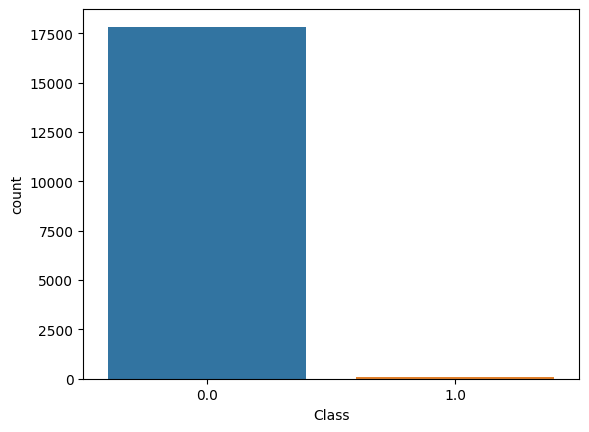

In [7]:
sns.countplot(data, x=data['Class'])

In [8]:
data['Class'].value_counts()

0.0    17836
1.0       81
Name: Class, dtype: int64

In [9]:
class_0 = data[data['Class']==0]
class_1 = data[data['Class']==1]

In [10]:
print(class_0.shape)

(17836, 31)


In [11]:
print(class_1.shape)

(81, 31)


Since V1-V28 values are scaled (between 0 and 1), therefore we need to check the time and the amount variables as well before we move on to handling the Class target variable.

In [12]:
scaler = StandardScaler()

In [13]:
data['Amount_scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time_scaled'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [14]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.434064,-1.409147
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.342606,-1.409147
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.644767,-1.409046
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.295994,-1.409046
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,0.013141,-1.408944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17912,1.412874,-0.525224,-0.064590,-0.917303,-0.575127,-0.460097,-0.492201,-0.081752,-1.062077,0.831941,...,0.504571,-0.215697,-0.317648,0.678751,-0.091695,-0.014617,-0.005543,0.0,-0.246348,1.532599
17913,-0.422159,0.231118,1.666711,0.451976,-0.203598,0.097244,-0.039666,0.354218,0.062463,-0.267672,...,0.435121,-0.056658,0.265867,-0.548204,0.734013,0.117023,0.130972,0.0,-0.309251,1.532599
17914,1.177387,-0.215585,0.202972,0.215323,-0.029312,0.601788,-0.297021,0.188082,0.436370,-0.199326,...,0.075903,-0.187120,-0.717798,0.555294,0.731531,-0.022112,-0.010929,0.0,-0.224676,1.532903
17915,-0.553746,0.880858,1.644821,-0.132657,0.120940,-0.267411,0.466892,0.222443,-0.639624,-0.174843,...,-0.348662,0.029947,0.199962,-0.328384,0.071511,0.275487,0.110195,0.0,-0.352121,1.532903


In [15]:
X = data.drop('Class' , axis=1)
y = data.Class

###### Under Sampling

In [16]:
under_sampler = RandomUnderSampler()

In [17]:
X_undersampled, y_undersampled = under_sampler.fit_resample(X, y)

In [18]:
print(Counter(y_undersampled))

Counter({0.0: 81, 1.0: 81})


In [19]:
X_undersampled['class'] = y_undersampled

<Axes: xlabel='class', ylabel='count'>

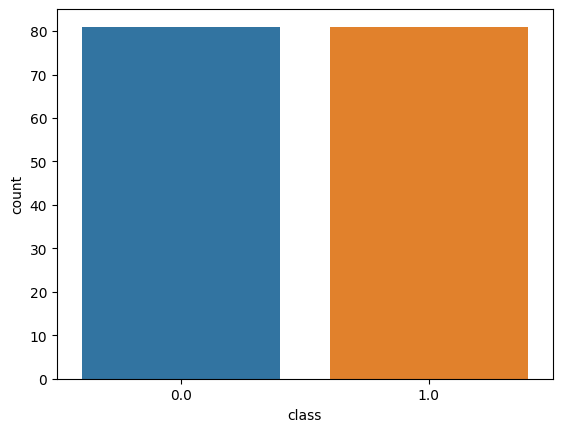

In [20]:
sns.countplot(data=X_undersampled , x=X_undersampled['class'])

**Note**: Drawbacks of the two

Undersampling - Random Under Sampler:

Loss of Information:Random undersampling involves discarding instances from the majority class randomly. This can lead to a significant loss of information and may discard potentially important examples.
Reduced Model Performance:In scenarios where the majority class contains valuable information, random undersampling might reduce the overall performance of the model by removing relevant instances.

Oversampling - SMOTE:

Overfitting to Synthetic Examples:The synthetic examples generated by SMOTE might lead to overfitting if the model relies too heavily on these artificial instances.
Sensitive to Noisy Data: SMOTE can be sensitive to noisy examples, and the generation of synthetic instances might be influenced by noisy data points in the minority class.


###### Over Sampling

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE()

In [23]:
X_oversampled, y_oversampled = smote.fit_resample(X, y)

In [24]:
X_oversampled['Class'] = y_oversampled

<Axes: xlabel='Class', ylabel='count'>

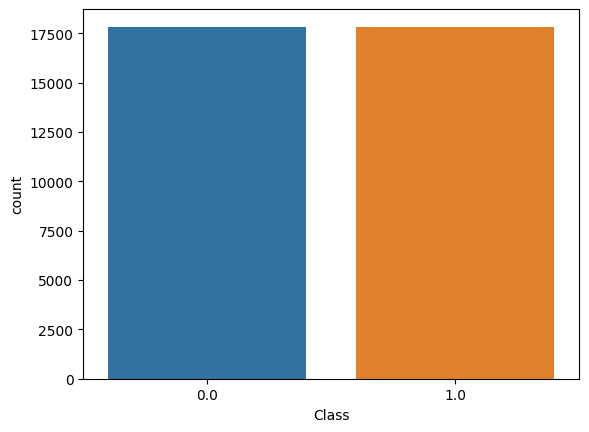

In [25]:
sns.countplot(data=X_oversampled , x=X_oversampled['Class'])

Create pipelines for oversampling and undersampling

In [26]:
oversample_pipeline = Pipeline([
    ('oversample', SMOTE())])

In [27]:
undersample_pipeline = Pipeline([
    ('undersample', RandomUnderSampler())])

In [28]:
X_oversampled, y_oversampled = oversample_pipeline.fit_resample(X, y)
X_undersampled, y_undersampled = undersample_pipeline.fit_resample(X, y)

In [29]:
data_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)
data_oversampled['Class'] = y_oversampled

In [30]:
data_undersampled = pd.DataFrame(X_undersampled, columns=X.columns)
data_undersampled['Class'] = y_undersampled

In [31]:
corr = data.corr()

In [32]:
colormap = sns.color_palette(palette='PRGn')

<Axes: >

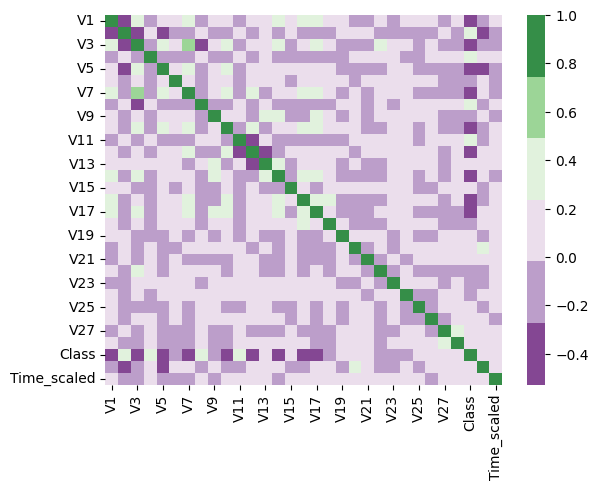

In [33]:
sns.heatmap(corr, annot=False,fmt='.1g', cmap=colormap)

In [34]:
corr_over = data_oversampled.corr()

<Axes: >

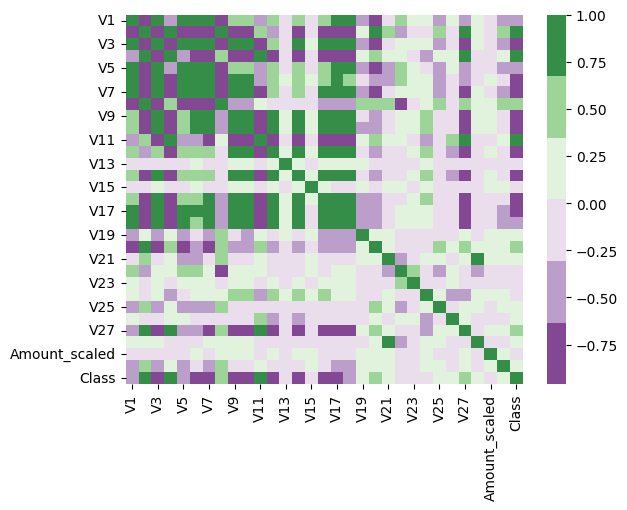

In [35]:
sns.heatmap(corr_over, annot=False,fmt='.1g', cmap=colormap)

In [36]:
corr_under = data_undersampled.corr()

<Axes: >

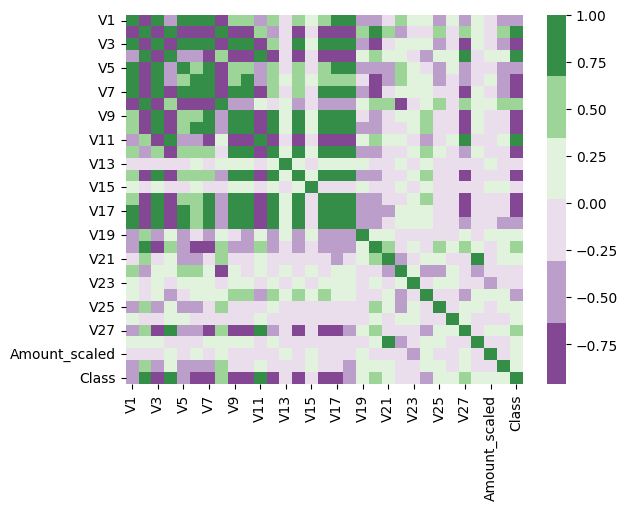

In [37]:
sns.heatmap(corr_under, annot=False,fmt='.1g', cmap=colormap)

positive correlation:V2, V4, V11

negative correlation: V10, V12, V14, V16

The idea is to remove the outliers in 2 different way on the data_undersampled and data_oversampled and fit the logistic regression model on both and will compare them in the end

In [38]:
model_iso = IsolationForest(contamination=0.03)

In [39]:
model_iso.fit(data_oversampled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.03)

In [40]:
preds = model_iso.predict(data_oversampled)

In [46]:
data_oversampled['outliers'] = preds

In [47]:
data_oversampled['outliers'].unique()

array([ 1, -1])

In [48]:
data_oversampled['outliers'].value_counts()

 1    34601
-1     1071
Name: outliers, dtype: int64

In [50]:
data_oversampled_cleaned = data_oversampled.query('outliers==1')

In [51]:
non_outlier_condition = (
    (data_undersampled['V2'] < data_undersampled['V2'].quantile(0.97)) &
    (data_undersampled['V4'] < data_undersampled['V4'].quantile(0.97)) &
    (data_undersampled['V10'] < data_undersampled['V10'].quantile(0.97)) &
    (data_undersampled['V11'] < data_undersampled['V11'].quantile(0.97)) &
    (data_undersampled['V12'] < data_undersampled['V12'].quantile(0.97)) &
    (data_undersampled['V14'] < data_undersampled['V14'].quantile(0.97)) &
    (data_undersampled['V16'] < data_undersampled['V16'].quantile(0.97)) &
    (data_undersampled['V2'] > data_undersampled['V2'].quantile(0.03)) &
    (data_undersampled['V4'] > data_undersampled['V4'].quantile(0.03)) &
    (data_undersampled['V10'] > data_undersampled['V10'].quantile(0.03)) &
    (data_undersampled['V11'] > data_undersampled['V11'].quantile(0.03)) &
    (data_undersampled['V12'] > data_undersampled['V12'].quantile(0.03)) &
    (data_undersampled['V14'] > data_undersampled['V14'].quantile(0.03)) &
    (data_undersampled['V16'] > data_undersampled['V16'].quantile(0.03))
)

In [52]:
data_undersampled_cleaned = data_undersampled[non_outlier_condition]

Logistic regression for data_undersampled_cleand - without outliers

In [53]:
model = LogisticRegression()

In [54]:
X_under = data_undersampled_cleaned.drop('Class', axis=1)
y_under = data_undersampled_cleaned['Class']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)

In [56]:
model.fit(X_under, y_under)

LogisticRegression()

In [57]:
y_pred_under = model.predict(X_test)

<Axes: >

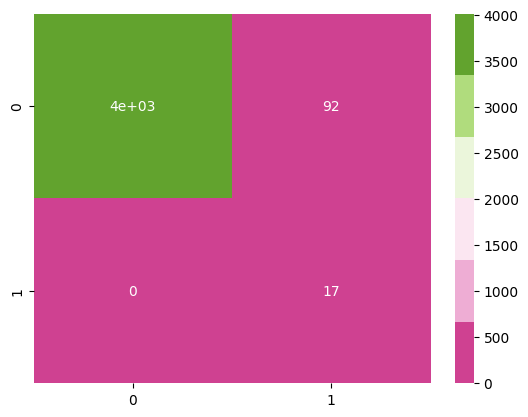

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_under)
cmap = sns.color_palette(palette='PiYG')

sns.heatmap(cm, annot=True, cmap=cmap)

In [59]:
from sklearn.metrics import classification_report

report = classification_report(y_pred_under, y_test)

print(report)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4012
         1.0       1.00      0.16      0.27       109

    accuracy                           0.98      4121
   macro avg       0.99      0.58      0.63      4121
weighted avg       0.98      0.98      0.97      4121



Logistic regression for data_oversampled_cleand - without outliers

In [60]:
X_over = data_oversampled_cleaned.drop('Class', axis=1)
y_over = data_oversampled_cleaned['Class']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)

In [62]:
model.fit(X_over, y_over)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
X_test['outliers'] = 1

In [64]:
y_pred_over = model.predict(X_test)

<Axes: >

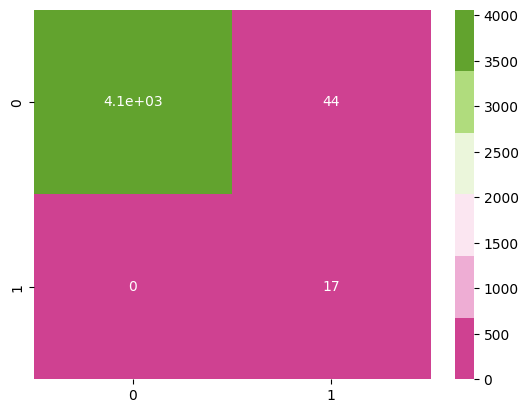

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_over)
cmap = sns.color_palette(palette='PiYG')

sns.heatmap(cm, annot=True, cmap=cmap)

In [66]:
from sklearn.metrics import classification_report

report = classification_report(y_pred_over, y_test)

print(report)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4060
         1.0       1.00      0.28      0.44        61

    accuracy                           0.99      4121
   macro avg       0.99      0.64      0.72      4121
weighted avg       0.99      0.99      0.99      4121



Comparison:

Undersampling: Achieves high precision for non-fraud cases but sacrifices recall for fraud cases.
Oversampling: Similar to undersampling, with high precision for non-fraud cases but low recall for fraud cases.

Considerations:

If the concern is reducing false positives (misclassifying non-fraud as fraud), you might prefer higher precision.
If the consequence of missing a fraud case (false negatives) is severe, you might prioritize higher recall.

 The choice depends on the specific objectives and trade-offs relevant to your application.